<a href="https://colab.research.google.com/github/garjesonal32/garjesonal32/blob/main/dv_proj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/superstore.csv'

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/superstore.csv', encoding='latin1')

# Print the DataFrame
print(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0         1.0  CA-2016-152156  11-08-2016  11-11-2016    Second Class   
1         2.0  CA-2016-152156  11-08-2016  11-11-2016    Second Class   
2         3.0  CA-2016-138688  06-12-2016   6/16/2016    Second Class   
3         4.0  US-2015-108966  10-11-2015  10/18/2015  Standard Class   
4         5.0  US-2015-108966  10-11-2015  10/18/2015  Standard Class   
...       ...             ...         ...         ...             ...   
10089     NaN             NaN         NaN         NaN             NaN   
10090     NaN             NaN         NaN         NaN             NaN   
10091     NaN             NaN         NaN         NaN             NaN   
10092     NaN             NaN         NaN         NaN             NaN   
10093     NaN             NaN         NaN         NaN             Na

In [49]:
# Display basic information about the dataset
print(df.head())             # Display the first few rows

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0     1.0  CA-2016-152156  11-08-2016  11-11-2016    Second Class    CG-12520   
1     2.0  CA-2016-152156  11-08-2016  11-11-2016    Second Class    CG-12520   
2     3.0  CA-2016-138688  06-12-2016   6/16/2016    Second Class    DV-13045   
3     4.0  US-2015-108966  10-11-2015  10/18/2015  Standard Class    SO-20335   
4     5.0  US-2015-108966  10-11-2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0     42420.0   Sout

In [50]:
print(df.info())             # Summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10094 entries, 0 to 10093
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         1000 non-null   float64
 1   Order ID       1000 non-null   object 
 2   Order Date     1000 non-null   object 
 3   Ship Date      1000 non-null   object 
 4   Ship Mode      1000 non-null   object 
 5   Customer ID    1000 non-null   object 
 6   Customer Name  1000 non-null   object 
 7   Segment        1000 non-null   object 
 8   Country        1000 non-null   object 
 9   City           1000 non-null   object 
 10  State          1000 non-null   object 
 11  Postal Code    1000 non-null   float64
 12  Region         1000 non-null   object 
 13  Product ID     1000 non-null   object 
 14  Category       1000 non-null   object 
 15  Sub-Category   1000 non-null   object 
 16  Product Name   1000 non-null   object 
 17  Sales          1000 non-null   float64
 18  Quanti

In [51]:
print(df.describe())         # Summary statistics

            Row ID   Postal Code        Sales     Quantity     Discount  \
count  1000.000000   1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000  53500.843000   241.121758     3.802000     0.162680   
std     288.819436  31494.144693   595.881785     2.268026     0.208418   
min       1.000000   1841.000000     1.080000     1.000000     0.000000   
25%     250.750000  19639.500000    18.378000     2.000000     0.000000   
50%     500.500000  50315.000000    55.740000     3.000000     0.200000   
75%     750.250000  85023.000000   213.206250     5.000000     0.200000   
max    1000.000000  98661.000000  8159.952000    14.000000     0.800000   

            Profit  
count  1000.000000  
mean     18.742424  
std     225.614300  
min   -3839.990400  
25%       1.808625  
50%       8.704000  
75%      27.317150  
max    3177.475000  


In [52]:
df.isnull().sum()


Row ID           9094
Order ID         9094
Order Date       9094
Ship Date        9094
Ship Mode        9094
Customer ID      9094
Customer Name    9094
Segment          9094
Country          9094
City             9094
State            9094
Postal Code      9094
Region           9094
Product ID       9094
Category         9094
Sub-Category     9094
Product Name     9094
Sales            9094
Quantity         9094
Discount         9094
Profit           9094
dtype: int64

In [53]:
category_counts = df['Category'].value_counts()
print(category_counts)

Office Supplies    603
Furniture          207
Technology         190
Name: Category, dtype: int64


**['column_name'].value_counts() provides a count of unique values in a specific column.**

In [54]:
unique_regions = df['Region'].unique()
print(unique_regions)

['South' 'West' 'Central' 'East' nan]


In [55]:
unique_customers = df['Customer ID'].nunique()
print(f"Number of unique customers: {unique_customers}")

Number of unique customers: 363


 **['column_name'].unique() returns an array of unique values in a specific column. df['column_name'].nunique() returns the number of unique values in a specific column.**  

In [56]:
correlation_matrix = df[['Sales', 'Quantity', 'Discount', 'Profit']].corr()
print(correlation_matrix)

             Sales  Quantity  Discount    Profit
Sales     1.000000  0.209264  0.028930  0.029432
Quantity  0.209264  1.000000  0.003940  0.009294
Discount  0.028930  0.003940  1.000000 -0.254819
Profit    0.029432  0.009294 -0.254819  1.000000


**df.corr() computes the correlation between all numerical columns in the DataFrame. It's useful to understand relationships between variables**

In [57]:
category_sales_mean = df.groupby('Category')['Sales'].mean()
print(category_sales_mean)

Category
Furniture          383.423038
Office Supplies    113.189630
Technology         492.104432
Name: Sales, dtype: float64


**groupby():
df.groupby('column_name').mean() allows you to group data based on a column and then apply an aggregation function (e.g., mean, sum, etc.)**

In [58]:
# Create a pivot table using the desired columns and aggregation function (e.g., 'mean')
pivot_table_result = pd.pivot_table(df, values='Sales', index=['Category'], columns=['Region'], aggfunc='mean')

# Print the pivot table
print(pivot_table_result)


Region              Central        East       South        West
Category                                                       
Furniture        389.652110  374.531450  329.432214  417.041286
Office Supplies   96.831569  115.148239  201.833250   84.371601
Technology       653.329788  266.826115  610.698500  496.226233


## **Univariate Analysis**

**Univariate Analysis:**

Univariate analysis involves examining a single variable in isolation. It helps in understanding the distribution, central tendency, and variability of the variable. Common techniques include

**1: Histogram for 'Sales'**

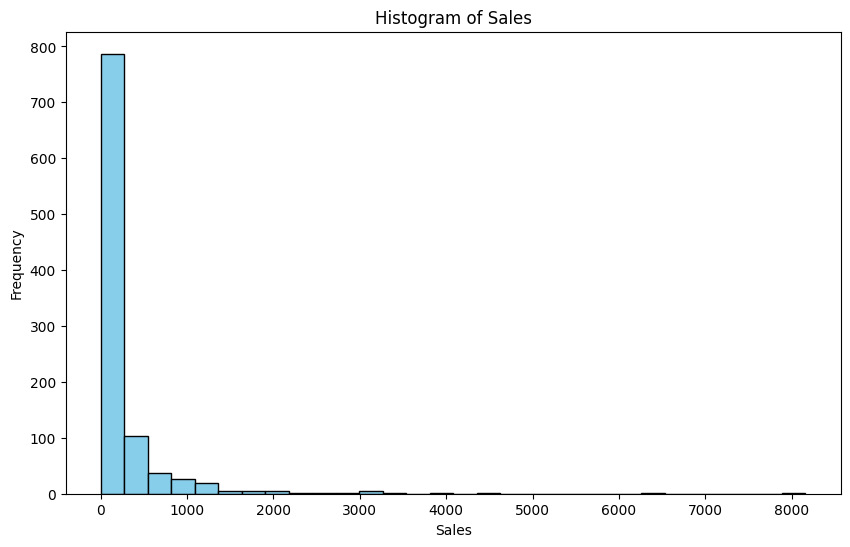

In [59]:
plt.figure(figsize=(10, 6))
plt.hist(df['Sales'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Sales')
plt.show()


**Conclusion : The histogram of sales shows that most sales fall within a certain range, with a few exceptionally high sales values.**

**Plot 2: Countplot for 'Category'**

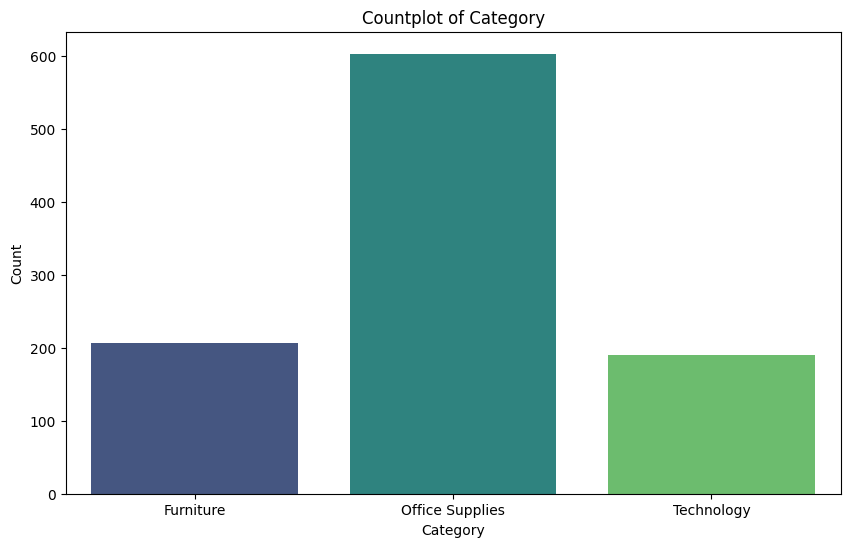

In [60]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', palette='viridis')
plt.title('Countplot of Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


**Conclusion : The countplot of categories reveals that 'Office Supplies' is the most frequently sold category, followed by 'Furniture' and 'Technology**

**3: Histogram for 'Quantity'**

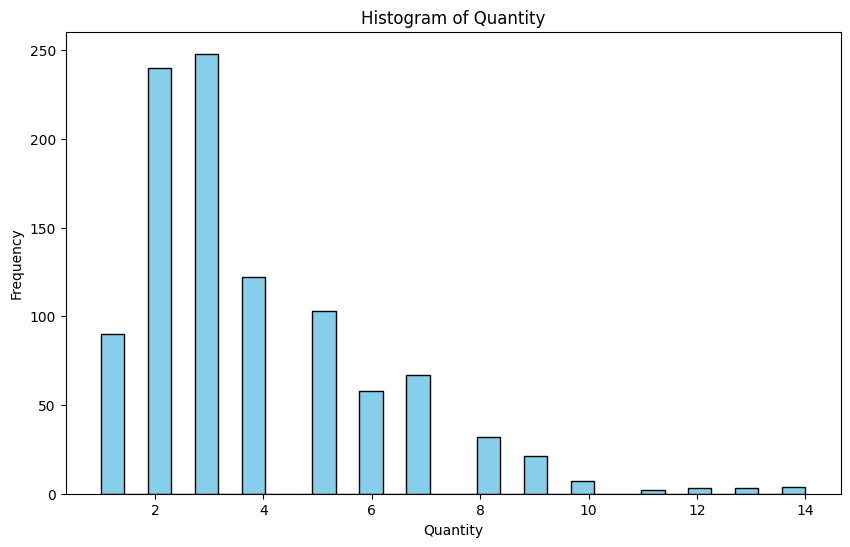

In [61]:
plt.figure(figsize=(10, 6))
plt.hist(df['Quantity'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Histogram of Quantity')
plt.show()


**Conclusion : The histogram of quantity indicates that most orders consist of a small number of items, with a few orders having higher quantities.**

**4.Countplot for 'Sub-Category'**

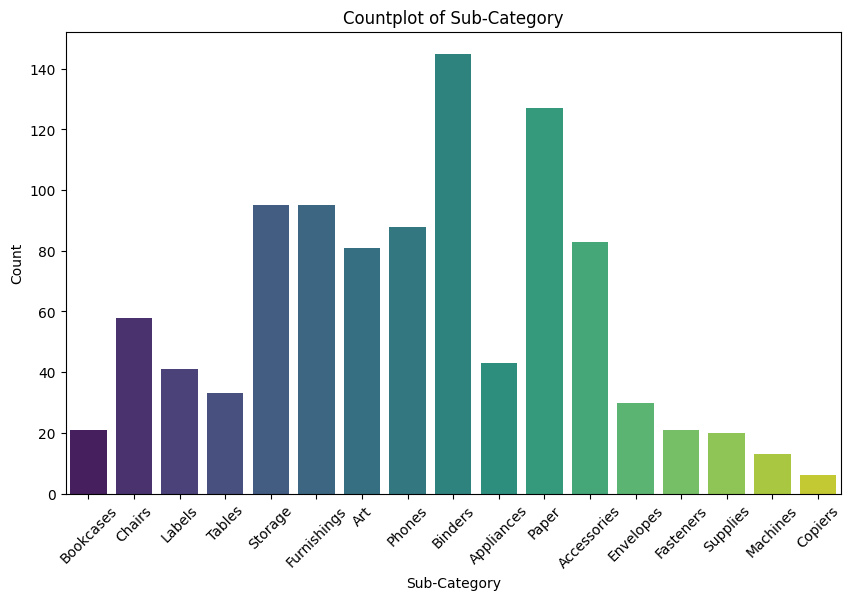

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sub-Category', palette='viridis')
plt.title('Countplot of Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


**Conclusion : The countplot of sub-categories shows that 'Binders' and 'Paper' are the most commonly ordered sub-categories, while 'Copiers' and 'Machines' are less frequently ordered.**

**5: Box Plot for 'Discount'**

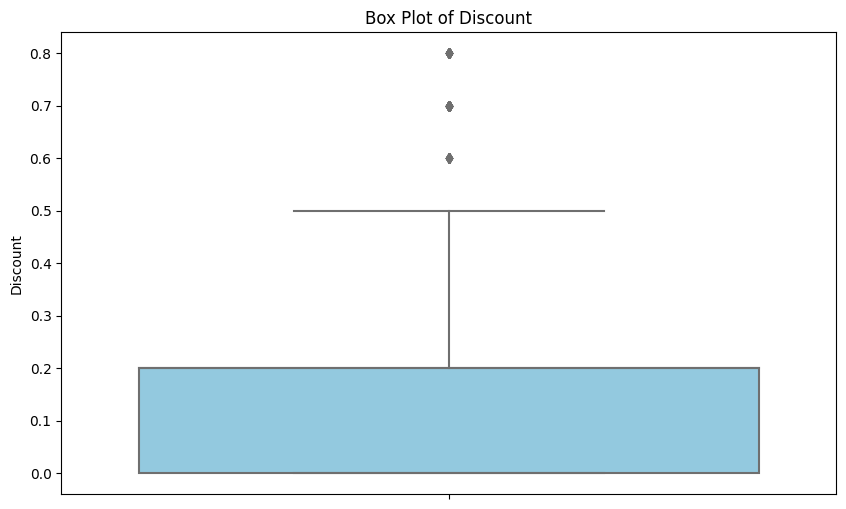

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Discount', color='skyblue')
plt.title('Box Plot of Discount')
plt.ylabel('Discount')
plt.show()


**Conclusion : The box plot of discounts suggests that the majority of products have low discounts, but some outliers have higher discounts.**

# **Bivariate Analysis**

**Bivariate Analysis:**

Bivariate analysis involves the analysis of two variables simultaneously to understand the relationship between them.

**1. Scatter Plot for 'Sales' vs 'Profit'**

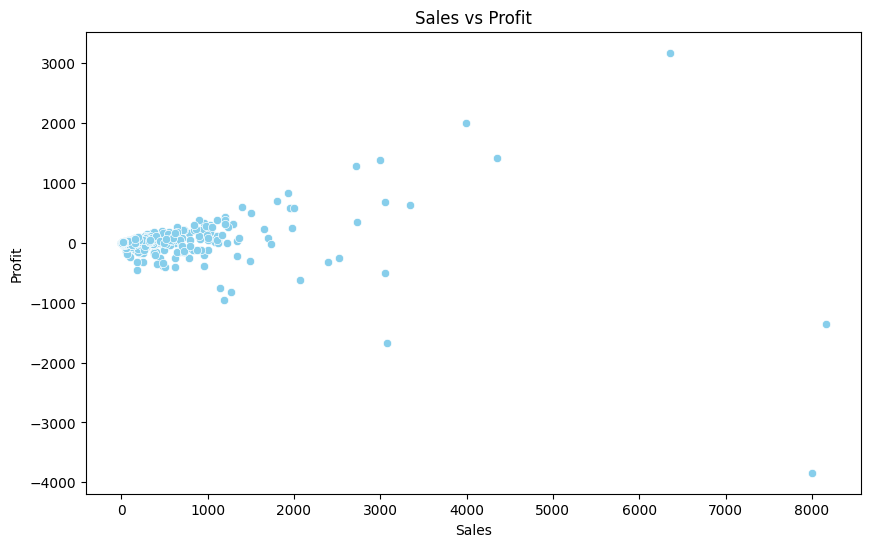

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df, color='skyblue')
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


**Conclusion : The scatter plot reveals a positive correlation between sales and profit, indicating that as sales increase, profit tends to increase as well.**

**2. Box Plot for 'Sales' by 'Category'**

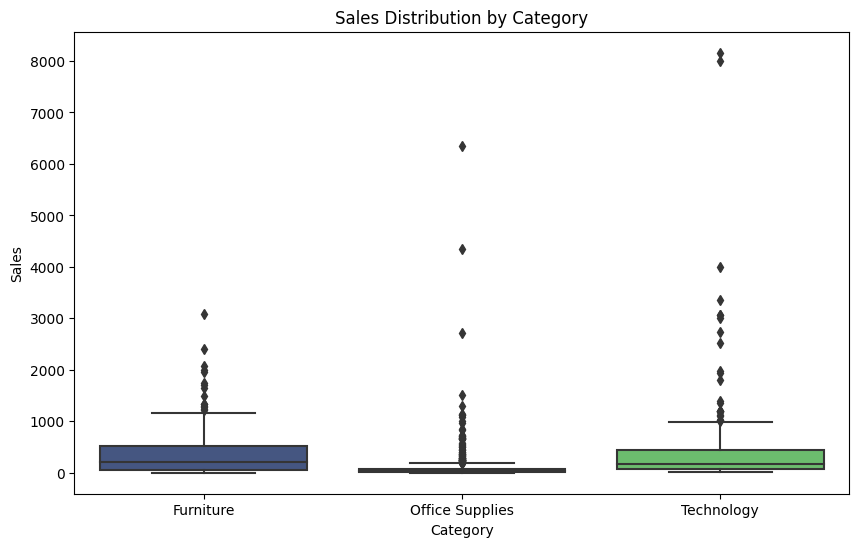

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=df, palette='viridis')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()


**Conclusion : The box plot by category illustrates variations in sales between different product categories, with 'Technology' products having the highest median sales.**

**3.Scatter Plot for 'Discount' vs 'Profit'**

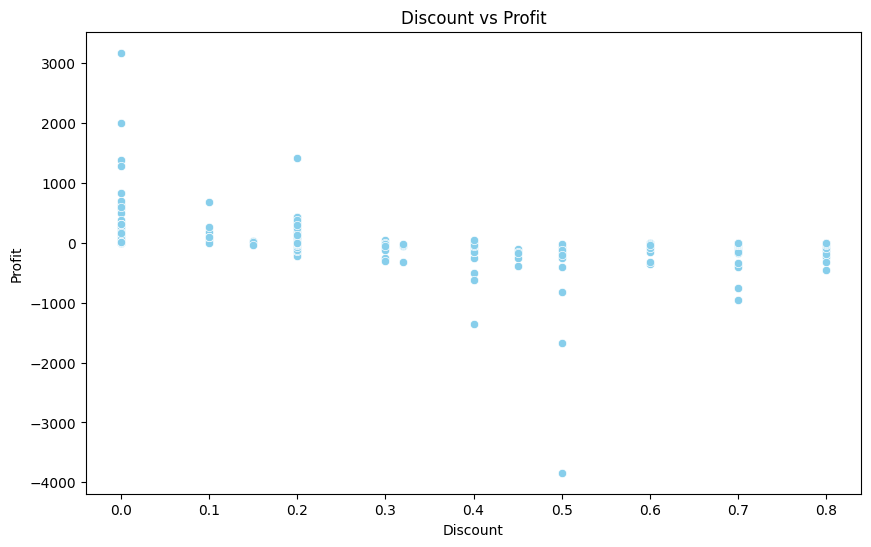

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=df, color='skyblue')
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()


**Conclusion : The scatter plot displays that offering high discounts can sometimes lead to reduced profit, suggesting the need for a balanced discount strategy.**

**4.Box Plot for 'Quantity' by 'Category'**

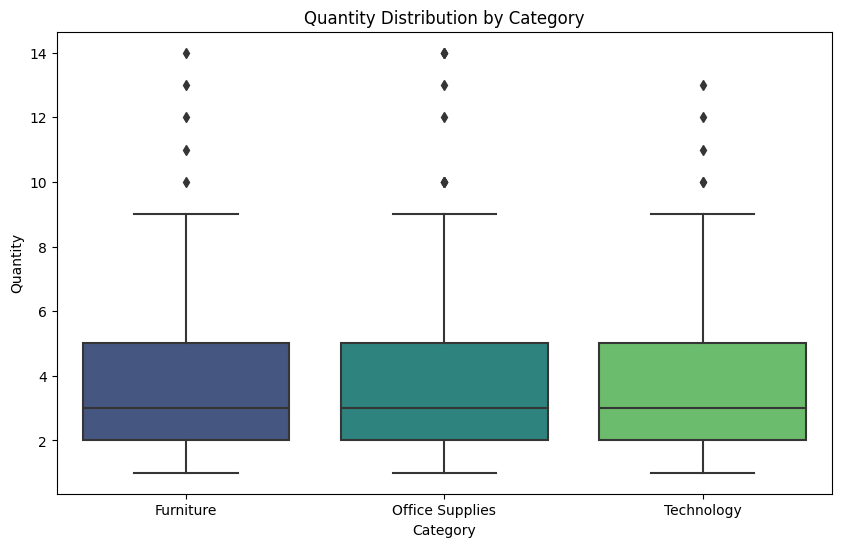

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Quantity', data=df, palette='viridis')
plt.title('Quantity Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.show()


**Conclusion : The box plot of quantity by category shows variations in the quantity ordered across different product categories, with 'Office Supplies' having a higher median quantity.**

**5.Box Plot for 'Sales' by 'Sub-Category'**

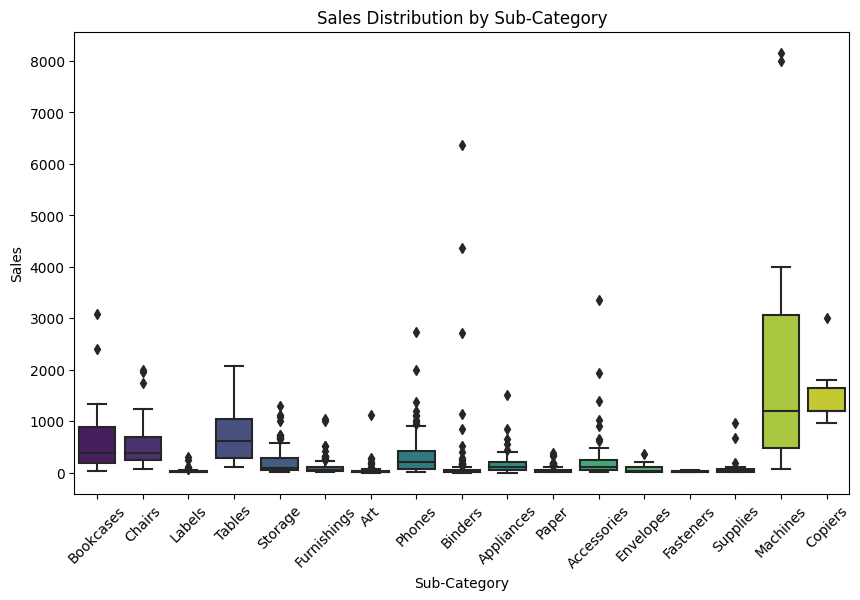

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sub-Category', y='Sales', data=df, palette='viridis')
plt.title('Sales Distribution by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

**Conclusion : The box plot by sub-category highlights the sales distribution within each sub-category, with 'Copiers' having the highest median sales.**

**6.Hexbin Plot for Sales vs Profit:**

<Figure size 1000x600 with 0 Axes>

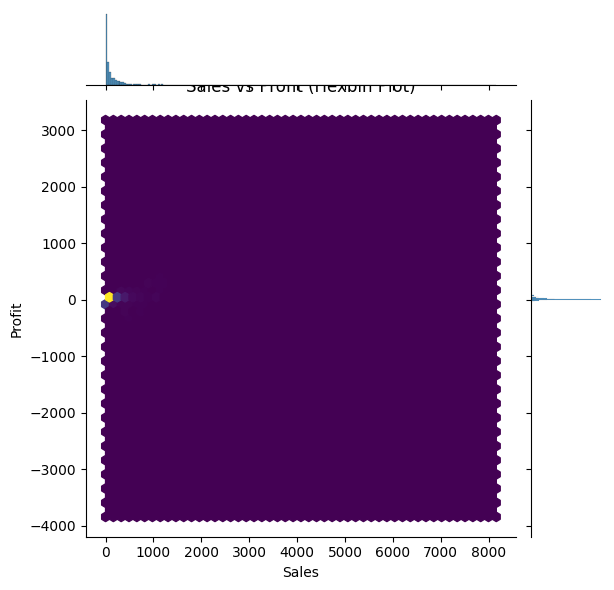

In [69]:
plt.figure(figsize=(10, 6))
sns.jointplot(x='Sales', y='Profit', data=df, kind='hex', cmap='viridis')
plt.title('Sales vs Profit (Hexbin Plot)')
plt.show()

**conclusion : The hexbin plot provides a 2D density estimation for 'Sales' vs 'Profit'. Key points:
It shows the concentration of data points in regions of high density.
The plot indicates areas where 'Sales' and 'Profit' have higher or lower concentrations.**

**7.Pair Plot for 'Sales', 'Quantity', 'Discount', and 'Profit' by Category:**

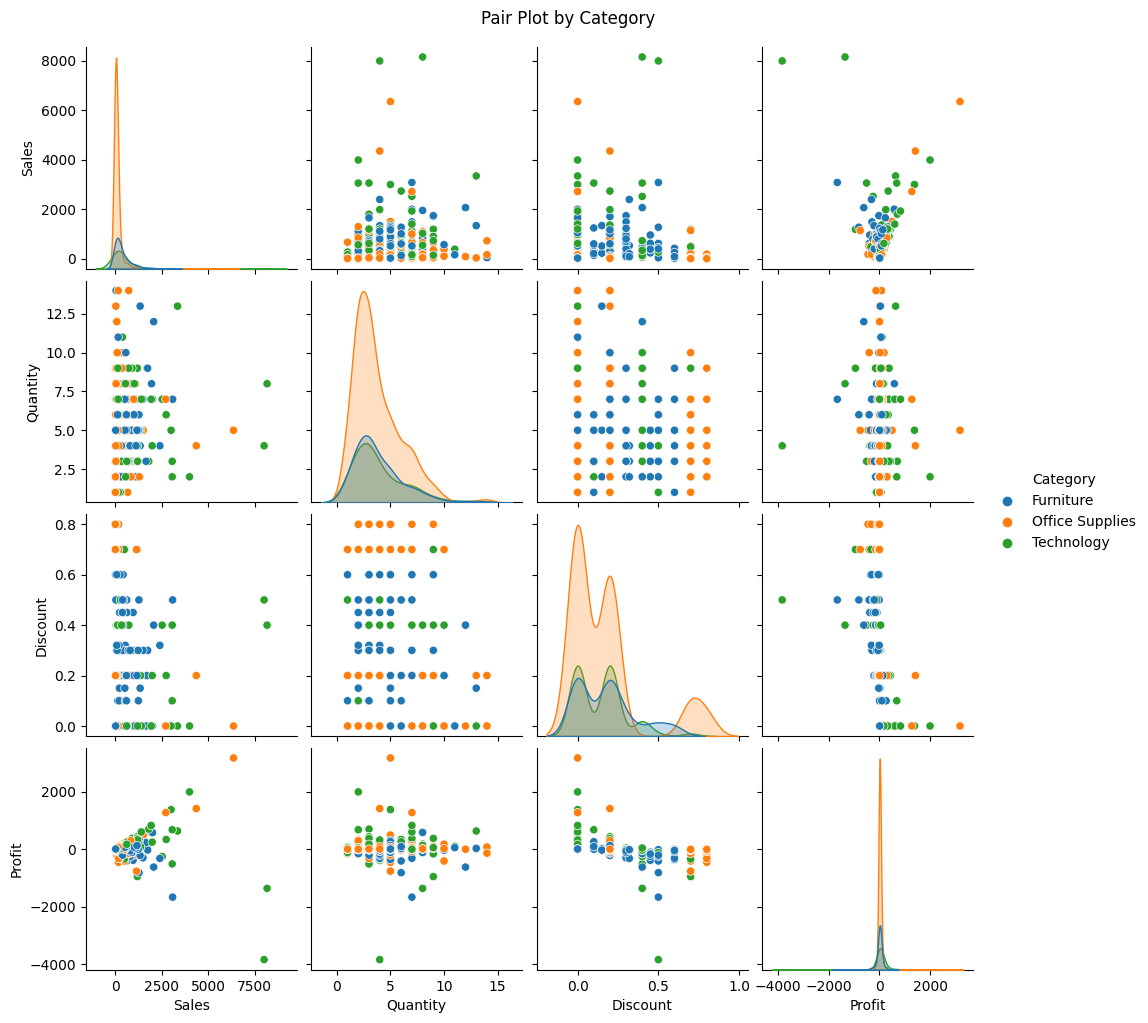

In [70]:
subset = df[['Sales', 'Quantity', 'Discount', 'Profit', 'Category']]
sns.pairplot(subset, hue='Category')
plt.suptitle('Pair Plot by Category', y=1.02)
plt.show()

**conclusion : The pair plot with hue by category explores relationships among 'Sales', 'Quantity', 'Discount', and 'Profit'. Observations:
Each pair of variables is plotted separately for each category.
'Technology' tends to have higher 'Sales' and 'Profit'.
'Discount' negatively affects 'Profit' in all categories.**

**8.Stacked Bar Plot for Sales and Profit by Region:**

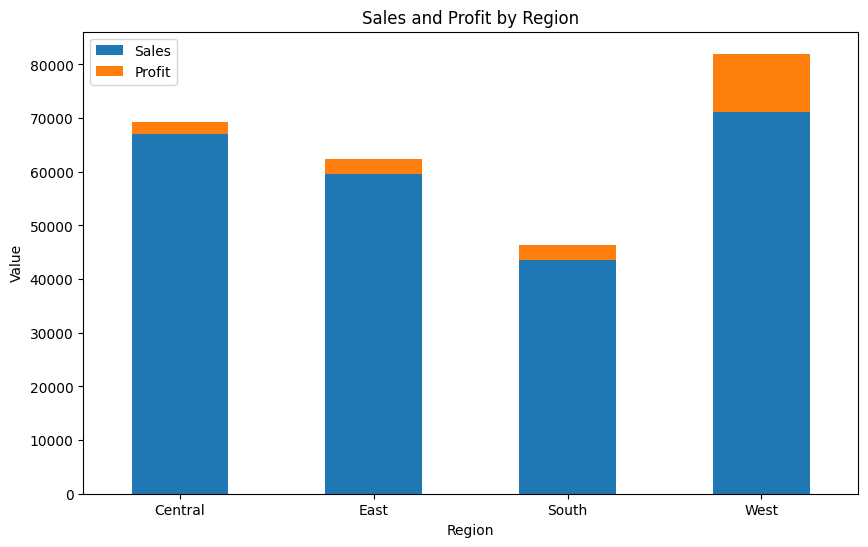

In [71]:
region_sales_profit = df.groupby('Region')[['Sales', 'Profit']].sum()
region_sales_profit.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sales and Profit by Region')
plt.xlabel('Region')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.show()

**conclusion : The stacked bar plot shows the total 'Sales' and 'Profit' for each region. Insights include:
The total 'Sales' and 'Profit' vary by region.
The plot helps identify regions with the highest and lowest contributions to overall 'Sales' and 'Profit'.**

## **Multivariate Analysis**

**Multivariate Analysis:**

Multivariate analysis involves the analysis of three or more variables to understand complex relationships.

 **1.Pair Plot for 'Sales', 'Quantity', 'Discount', and 'Profit'**

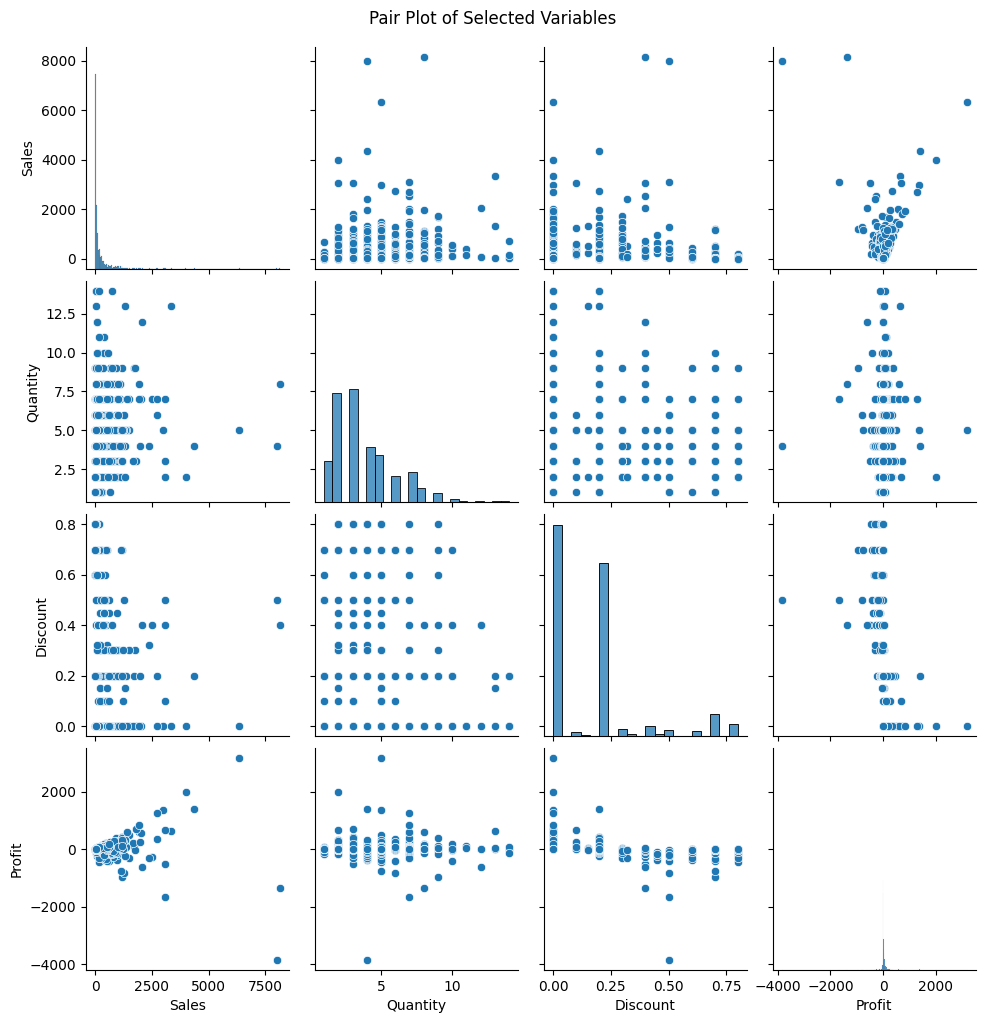

In [72]:
subset = df[['Sales', 'Quantity', 'Discount', 'Profit']]
sns.pairplot(subset)
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.show()


**Conclusion : The pair plot visualizes relationships between these variables. Sales and profit appear positively correlated, while discount shows some negative correlation with profit.**

**2.Heatmap for Correlation Matrix**

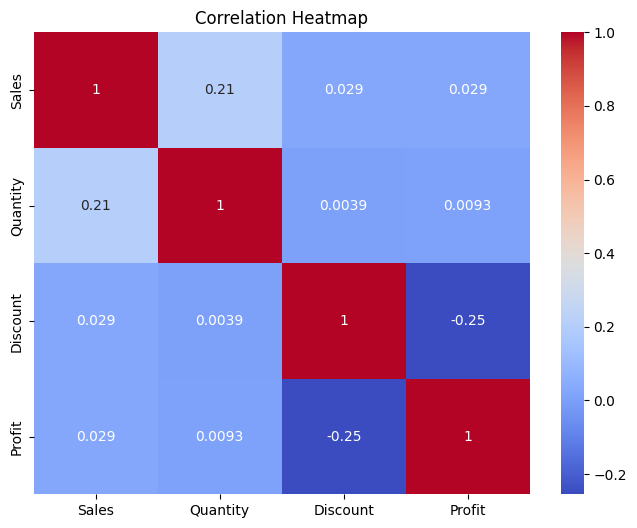

In [73]:
correlation_matrix = df[['Sales', 'Quantity', 'Discount', 'Profit']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**Conclusion : The heatmap of the correlation matrix quantifies relationships between numeric variables. Sales and profit have a positive correlation, while discount has a negative correlation with profit.**

**3. Bar Plot for Average 'Sales' by 'Category' and 'Region'**

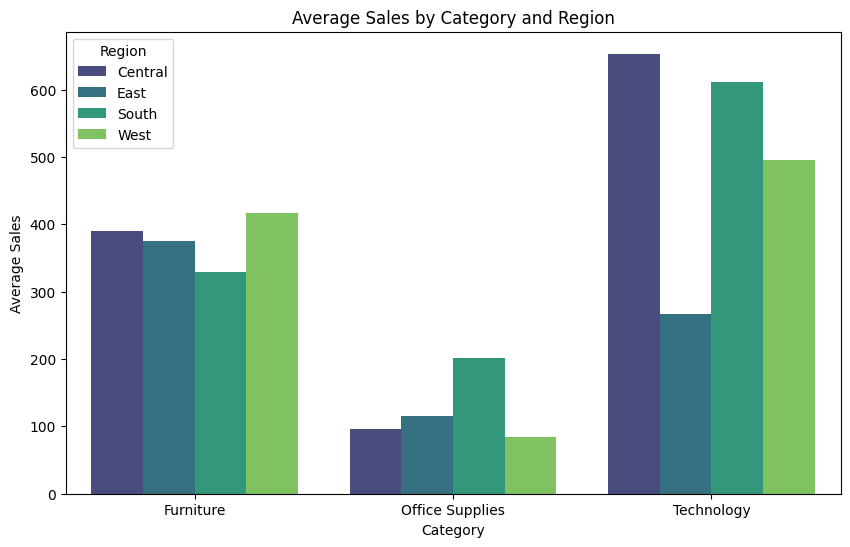

In [74]:
plt.figure(figsize=(10, 6))
avg_sales_by_category_region = df.groupby(['Category', 'Region'])['Sales'].mean().reset_index()
sns.barplot(x='Category', y='Sales', hue='Region', data=avg_sales_by_category_region, palette='viridis')
plt.title('Average Sales by Category and Region')
plt.xlabel('Category')
plt.ylabel('Average Sales')
plt.show()


**Conclusion : The bar plot illustrates the average sales by category and region, helping identify which categories and regions contribute the most to sales.**

**4.Scatter Plot Matrix for 'Sales', 'Quantity', 'Discount', and 'Profit'**

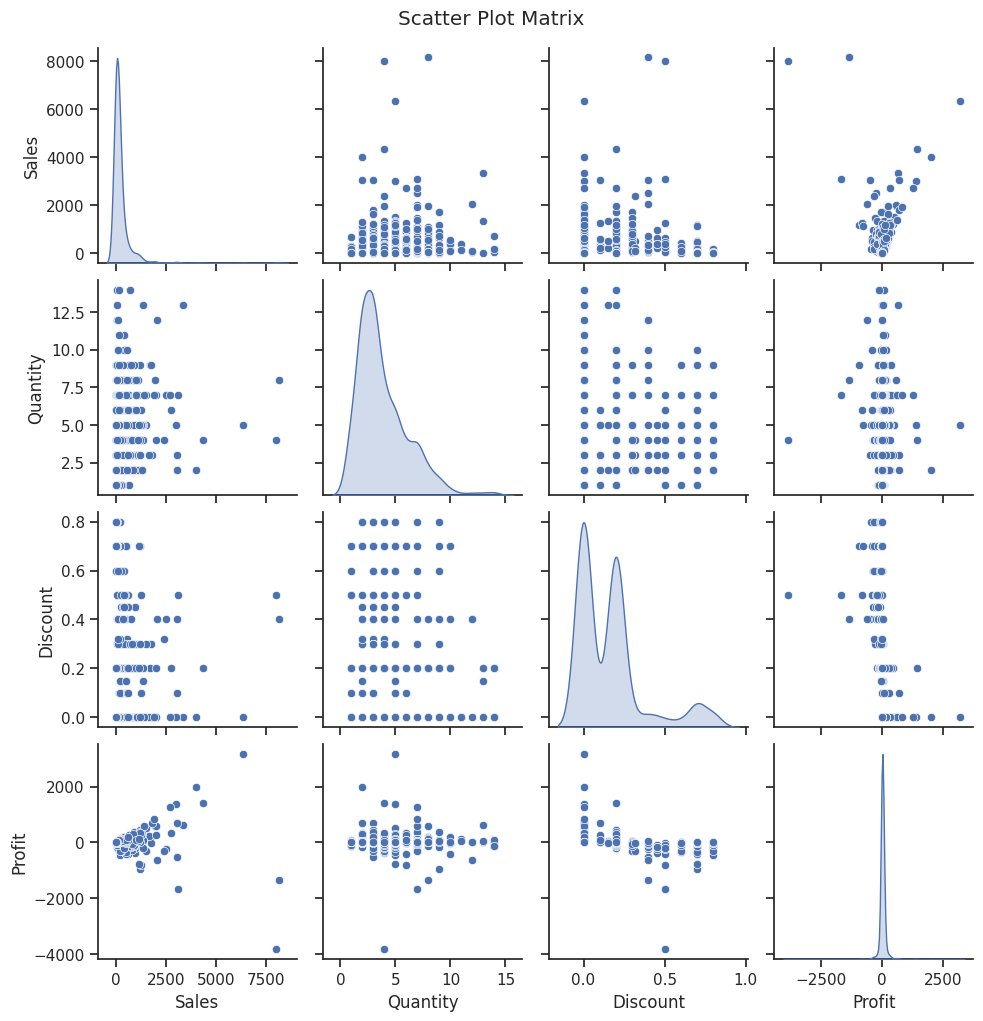

In [75]:
sns.set(style="ticks")
sns.pairplot(df[['Sales', 'Quantity', 'Discount', 'Profit']], diag_kind="kde")
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()


**Conclusion : The scatter plot matrix provides a comprehensive view of relationships between these variables. It confirms the positive correlation between sales and profit.**

**5.Violin Plot for 'Category' vs 'Sales'**

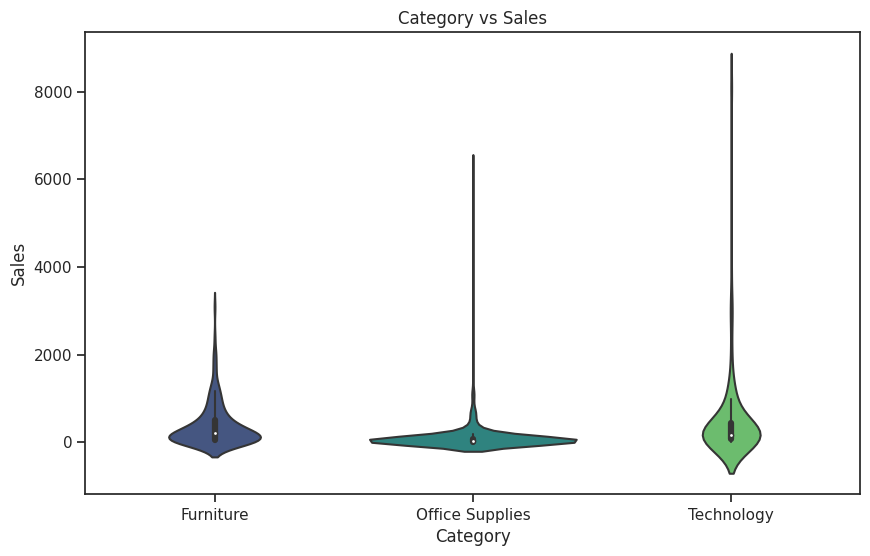

In [76]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Category', y='Sales', data=df, palette='viridis')
plt.title('Category vs Sales')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()


**Conclusion : The violin plot visualizes the distribution of sales across different product categories, showcasing the spread of sales values within each category.**

**6.Parallel Coordinates Plot for 'Sales', 'Quantity', 'Discount', 'Profit' by Category**

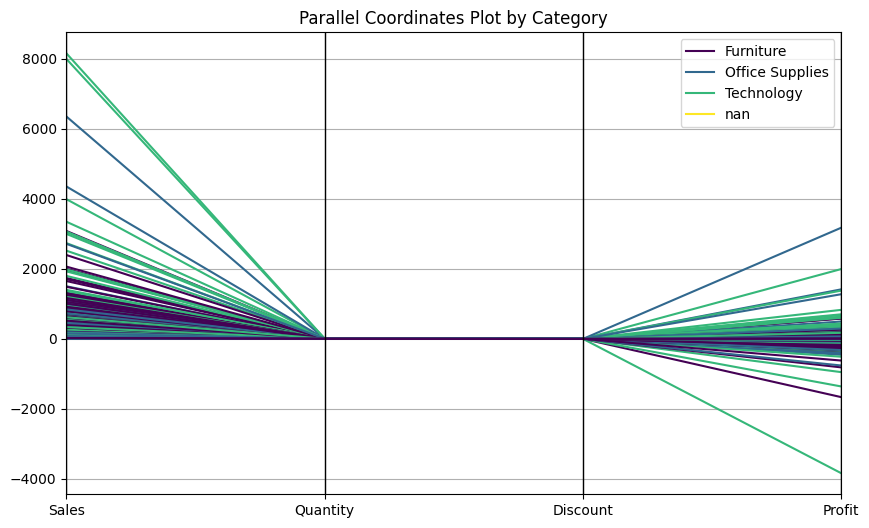

In [23]:
from pandas.plotting import parallel_coordinates
subset = df[['Sales', 'Quantity', 'Discount', 'Profit', 'Category']]
plt.figure(figsize=(10, 6))
parallel_coordinates(subset, 'Category', colormap='viridis')
plt.title('Parallel Coordinates Plot by Category')
plt.show()


**conclusion: The parallel coordinates plot displays the trends and relationships of 'Sales', 'Quantity', 'Discount', and 'Profit' for different categories. Key takeaways include:  Each line represents a category('Furniture', 'Office Supplies', 'Technology').
 Categories show distinct patterns: 'Technology' has higher 'Sales' and 'Profit'. 'Discount' has an inverse relationship with 'Profit' in all categories**



**7.Joint KDE Plot for Sales vs Profit:**

<Figure size 1000x600 with 0 Axes>

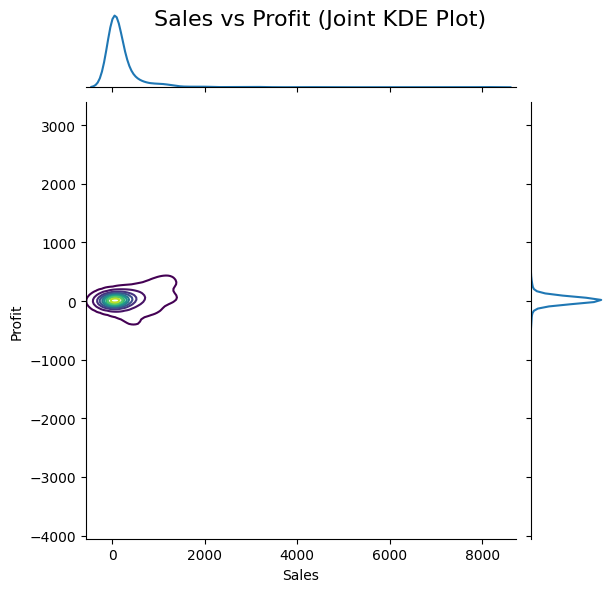

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
g = sns.jointplot(x='Sales', y='Profit', data=df, kind='kde', cmap='viridis')

# Set axis labels
g.set_axis_labels('Sales', 'Profit')

# Add a title
g.fig.suptitle('Sales vs Profit (Joint KDE Plot)', fontsize=16)
plt.show()

**conclusion :
     The joint KDE plot provides a 2D density estimation of the relationship between 'Sales' and 'Profit'. Key observations include:
The highest density regions are in the middle where 'Sales' and 'Profit' are moderate.
The plot indicates that as 'Sales' increase, there is a concentration of higher 'Profit'.**

**8.Cluster Map for Correlation Matrix:**

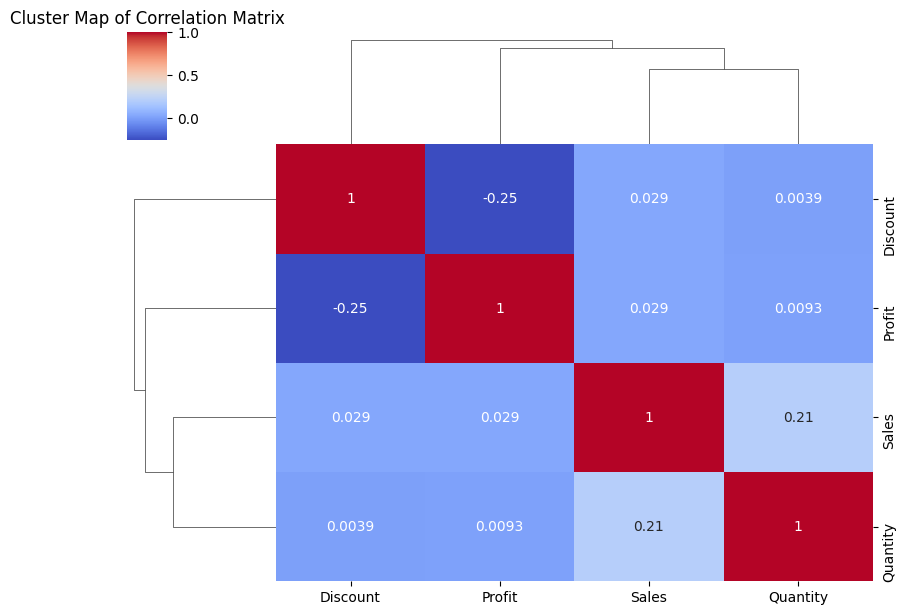

In [47]:
correlation_matrix = df[['Sales', 'Quantity', 'Discount', 'Profit']].corr()
sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm', figsize=(8, 6))
plt.title('Cluster Map of Correlation Matrix')
plt.show()


**conclusion: The cluster map visualizes the correlation matrix between 'Sales', 'Quantity', 'Discount', and 'Profit'.
It helps identify patterns and relationships between these variables. In this cluster map :             
 Positive correlations appear in warm colors (e.g., 'Sales' and 'Profit' have a positive correlation).
  Negative correlations appear in cool colors.
 Variables that are highly correlated tend to cluster together.
 'Sales' and 'Profit' are positively correlated, while 'Discount' shows a negative correlation with 'Profit'**